Henning Hoeber, 2025

I investigate collinearity by 
*  fixing the first basis function to a unit vector.
*  running two term regression
*  varying the second basis function in two ways
*  first the angle of the second basis function to the first
*  second the scale/norm of the second basis function relative to the first

Actual angle between f1 and f2 =  41.30953022082635


<Figure size 600x300 with 0 Axes>

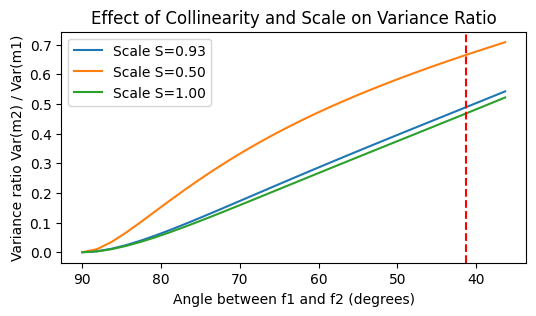

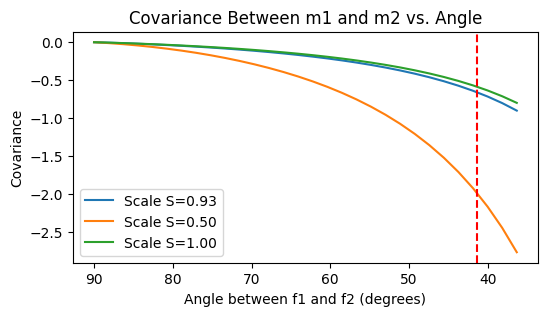

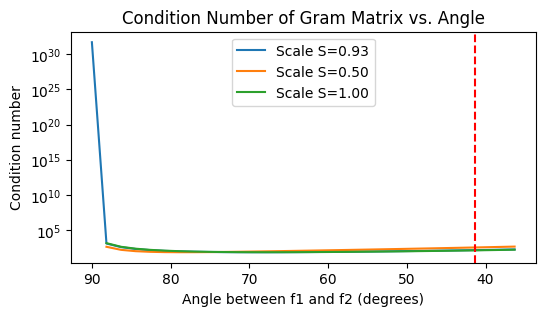

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of data points
np.random.seed(42)

# Define the first basis function (a vector of ones)
theta_deg = np.arange(0, 36, 1)
theta_rad = np.radians(theta_deg)
n_AVOpoints = len(theta_rad)

# Basis functions: 1 and sin^2
f1 = np.ones_like(theta_rad)
normf1 = np.linalg.norm(f1)
f2 = np.sin(theta_rad)**2
normf2 = np.linalg.norm(f2)
actualScale = normf2 ## for AVO this is the true scale factor

# Method 2: Using f2perp and tan formula
proj_f2_on_f1 = (np.dot(f2, f1) / np.dot(f1, f1)) * f1
# Compute the perpendicular part of f2 relative to f1
f_perpendicular = f2 - proj_f2_on_f1
# Calculate the magnitudes
norm_proj = np.linalg.norm(proj_f2_on_f1)  # Magnitude of the projection
norm_perp = np.linalg.norm(f_perpendicular)  # Magnitude of the perpendicular component
# Calculate the tangent of the angle
tan_theta = norm_perp / norm_proj
angle_degrees = np.degrees(np.arctan(tan_theta))  # Convert to degrees
print("Actual angle between f1 and f2 = ", angle_degrees)

# Define a range of angles from nearly collinear (0 degrees) to orthogonal (90 degrees)
angles = np.linspace(90, angle_degrees - 5, 30)  # Vary from orthogonal (90 degrees) to nearly collinear (1 degree)
scale_factors = [ actualScale, 0.5, 1]  # Different scale factors to explore

# Store results
variances_m1 = []
variances_m2 = []
covariances = []
condition_numbers = []

# Open figures before the loop
# Open figures before the loop
fig1 = plt.figure(1, figsize=(6, 3))  
fig2 = plt.figure(2, figsize=(6, 3))  
fig3 = plt.figure(3, figsize=(6, 3))  

# Example data
plt.figure(figsize=(6, 3))

for S in scale_factors:
    #print('scale = ', S)
    var_m1 = []
    var_m2 = []
    cov_m1m2 = []
    cond_nums = []
    
    for angle in angles:
        #print('angles = ', angle)
    
        # Define f2 with varying collinearity
        f2 = f1 + S*np.tan(np.radians(angle)) * np.linspace(0, 1, n_AVOpoints)  # Gradually tilting f2
        normf1 = np.linalg.norm(f1)

        
        # Construct design matrix A
        A = np.column_stack((f1, f2))
        
        # Compute the Gram matrix A^T A
        G = A.T @ A
        
        # Compute variance-covariance matrix (inverse of Gram matrix)
        G_inv = np.linalg.inv(G)
        
        # Extract variances and covariance
        var_m1.append(G_inv[0, 0])
        var_m2.append(G_inv[1, 1])
        cov_m1m2.append(G_inv[0, 1])
        
        # Compute condition number of the Gram matrix (measure of collinearity)
        cond_nums.append(np.linalg.cond(G))
    
    # Store results for this scale factor
    variances_m1.append(var_m1)
    variances_m2.append(var_m2)
    covariances.append(cov_m1m2)
    condition_numbers.append(cond_nums)
    
    # Plot variance ratio m2/m1
    plt.figure(fig1.number)  # Set the active figure
    plt.plot(angles, np.array(var_m2) / np.array(var_m1), label=f"Scale S={S:.2f}")
    plt.xlabel("Angle between f1 and f2 (degrees)")
    plt.gca().invert_xaxis()
    plt.ylabel("Variance ratio Var(m2) / Var(m1)")
    plt.title("Effect of Collinearity and Scale on Variance Ratio")
    plt.legend()
    
    plt.figure(fig2.number)  
    plt.plot(angles, np.array(cov_m1m2), label=f"Scale S={S:.2f}")    
    plt.xlabel("Angle between f1 and f2 (degrees)")
    plt.gca().invert_xaxis()
    plt.ylabel("Covariance")
    plt.title('Covariance Between m1 and m2 vs. Angle')
    plt.legend()

    plt.figure(fig3.number)  
    plt.plot(angles, np.array(cond_nums), label=f"Scale S={S:.2f}")    
    plt.xlabel("Angle between f1 and f2 (degrees)")
    plt.gca().invert_xaxis()
    plt.ylabel("Condition number")
    plt.title('Condition Number of Gram Matrix vs. Angle')
    plt.yscale("log")
    plt.legend()

plt.figure(fig1.number)  # Set the active figure
plt.axvline(x=angle_degrees, color="red", linestyle="--", label="AVO Shuey basis angle")
plt.figure(fig2.number)  # Set the active figure
plt.axvline(x=angle_degrees, color="red", linestyle="--", label="AVO Shuey basis angle")
plt.figure(fig3.number)  # Set the active figure
plt.axvline(x=angle_degrees, color="red", linestyle="--", label="AVO Shuey basis angle")
plt.show()
